[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


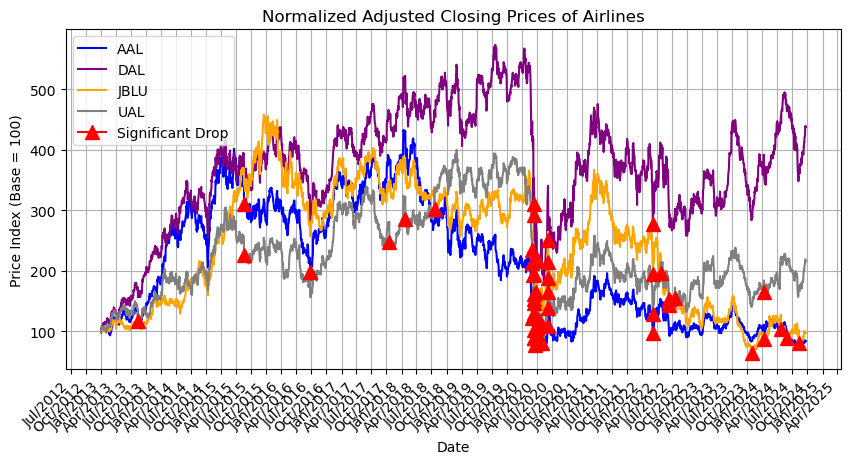

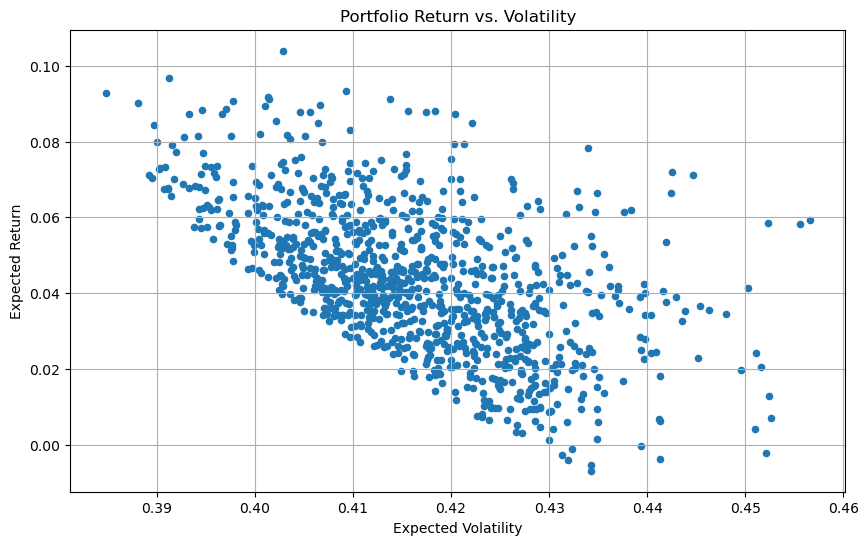

In [6]:
!pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define the assets (updated tickers)
assets = ['AAL', 'DAL', 'JBLU', 'UAL']
colors = ['blue', 'purple', 'orange', 'gray']  # Color for each asset
pf_data = pd.DataFrame()

# Retrieve adjusted close prices for each asset
for a in assets:
    pf_data[a] = yf.download(a, start='2013-01-01')['Adj Close']

# Calculate log returns
log_returns = np.log(pf_data / pf_data.shift(1))

# Initialize number of assets
num_assets = len(assets)

# Portfolio simulation
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

# Convert to NumPy arrays
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

# Create a DataFrame for portfolios
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

# Normalize and plot adjusted closing prices
plt.figure(figsize=(10, 5))
for idx, asset in enumerate(assets):
    (pf_data[asset] / pf_data[asset].iloc[0] * 100).plot(color=colors[idx], label=asset)

# Formatting the x-axis for quarterly labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set ticks every quarter

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title("Normalized Adjusted Closing Prices of Airlines")
plt.xlabel("Date")
plt.ylabel("Price Index (Base = 100)")

# Highlight significant drops with red triangles
threshold = 10  # Define a significant drop threshold (10%)

# Track if significant drops are plotted
significant_drop_label_added = False

for idx, asset in enumerate(assets):
    # Calculate the percentage change
    pct_change = pf_data[asset].pct_change() * 100

    # Identify significant drops
    significant_drops = pct_change[pct_change < -threshold]

    # Plot triangles at significant drop points in red
    for date in significant_drops.index:
        drop_value = pf_data[asset].loc[date] / pf_data[asset].iloc[0] * 100  # Normalized value
        plt.plot(date, drop_value, marker='^', color='red', markersize=10)
        
        # Add a legend entry for significant drop if not added already
        if not significant_drop_label_added:
            plt.plot([], [], marker='^', color='red', markersize=10, label='Significant Drop')
            significant_drop_label_added = True

# Show grid
plt.grid()

# Display the plot
plt.legend()
plt.show()

# Plot the results of the portfolio simulation
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Portfolio Return vs. Volatility')
plt.grid(True)
plt.show()

# Summary
# Data Retrieval:
# The adjusted closing prices for American Airlines (AAL), Delta Air Lines (DAL), JetBlue Airways (JBLU), and United Airlines (UAL) 
# from January 1, 2013, to the present are downloaded using the yfinance library and stored in a DataFrame called pf_data.

# Log Returns Calculation:
# Logarithmic returns are calculated from the adjusted closing prices. This involves taking the natural logarithm 
# of the ratio of the current price to the previous price. Log returns are useful for financial analysis as they are time additive.

# Portfolio Simulation:
# The code generates 1,000 random portfolios by assigning random weights to each of the four assets. 
# These weights are normalized so that their sum equals 1. For each portfolio, the expected annual return is calculated 
# by taking the weighted average of the log returns and multiplying by 250 (the typical number of trading days in a year).
# The portfolio volatility (risk) is calculated using the covariance matrix of the log returns and the weights of the assets in the portfolio.

# Results Compilation:
# The expected returns and volatilities of all simulated portfolios are stored in a DataFrame called portfolios.

# Visualization:
# A scatter plot is created to visualize the relationship between expected return and volatility for the simulated portfolios. 
# The x-axis represents expected volatility, and the y-axis represents expected return.

# Interpretation of Output:
# The scatter plot illustrates the trade-off between risk (volatility) and return. 
# Generally, you would expect to see a positive correlation: as expected return increases, so does expected volatility. 
# This reflects the principle that higher potential returns come with higher risk.
# The distribution of points in the plot can help identify the efficient frontier, where optimal portfolios lie. 
# Portfolios that are higher on the y-axis (higher return) for a given level of risk on the x-axis are considered more favorable.
# Any outliers or clusters of points can provide insights into which combinations of asset weights yield the best risk-return trade-offs.
# Overall, the output helps investors understand the possible outcomes of different asset allocations within the specified assets, 
# guiding them in making informed investment decisions.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


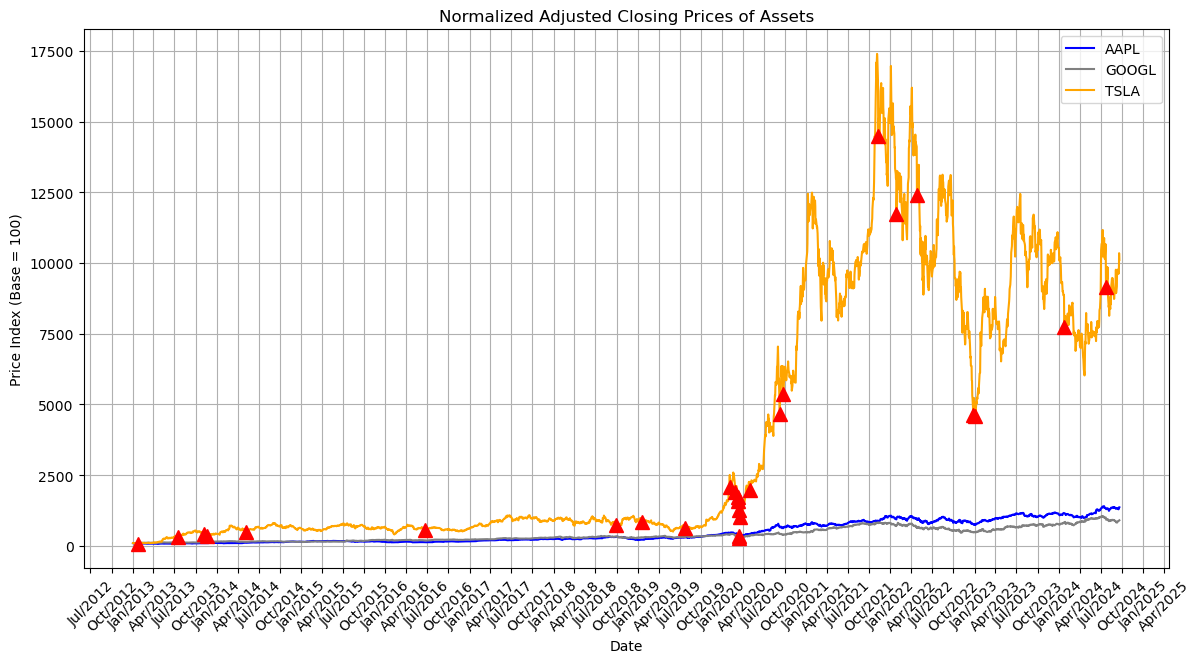

<Figure size 1000x600 with 0 Axes>

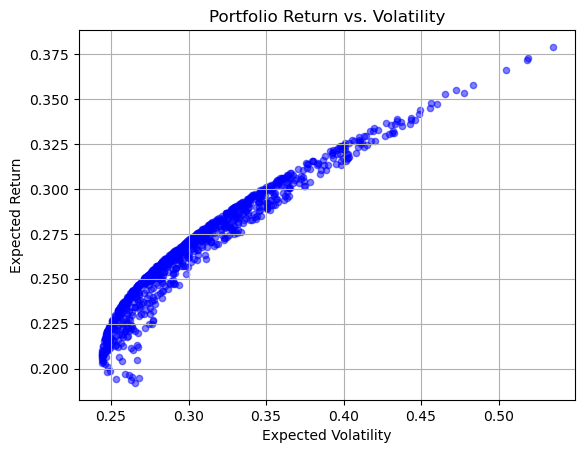


        Summary Interpretation:
        ------------------------
        1. Data Retrieval:
           - Adjusted closing prices for the specified assets are retrieved starting from January 1, 2013.
        
        2. Log Returns Calculation:
           - Logarithmic returns are computed, providing a time-additive measure useful for financial analysis.
        
        3. Portfolio Simulation:
           - 1,000 random portfolios are generated. For each portfolio, expected returns and volatilities are calculated.
           - Expected returns are the weighted average of log returns, annualized.
           - Expected volatility is computed using the covariance matrix of returns, reflecting risk.
        
        4. Visualization:
           - The first plot shows normalized price trends for the assets (AAPL in blue, GOOGL in gray, TSLA in orange), with significant drops highlighted.
           - The second plot displays the relationship between expected return and volatility for the s

In [11]:
# Step 0: Install Required Libraries
# Uncomment the following line to install the necessary libraries if they are not already installed
# !pip install numpy pandas yfinance matplotlib

# Step 1: Import Libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 2: Define a Function to Retrieve Data
def retrieve_data(tickers, start_date='2013-01-01'):
    """Retrieve adjusted closing prices for specified tickers."""
    try:
        data = pd.DataFrame()
        for ticker in tickers:
            data[ticker] = yf.download(ticker, start=start_date)['Adj Close']
        return data
    except Exception as e:
        print(f"Error retrieving data: {e}")
        return None

# Step 3: Calculate Log Returns
def calculate_log_returns(prices):
    """Calculate log returns from price data."""
    return np.log(prices / prices.shift(1))

# Step 4: Simulate Portfolios
def simulate_portfolios(log_returns, num_portfolios=1000):
    """Simulate random portfolios and calculate their expected returns and volatilities."""
    num_assets = log_returns.shape[1]
    portfolio_returns = []
    portfolio_volatilities = []

    for _ in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)  # Normalize weights
        portfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)  # Annualized return
        portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))  # Annualized volatility

    return np.array(portfolio_returns), np.array(portfolio_volatilities)

# Step 5: Plot Results
def plot_results(prices, portfolios):
    """Plot normalized price data and portfolio simulation results."""
    # Plot normalized adjusted closing prices
    plt.figure(figsize=(14, 7))
    prices_normalized = prices / prices.iloc[0] * 100
    plt.plot(prices_normalized['AAPL'], color='blue', label='AAPL')   # Apple
    plt.plot(prices_normalized['GOOGL'], color='gray', label='GOOGL') # Google
    plt.plot(prices_normalized['TSLA'], color='orange', label='TSLA') # Tesla

    # Formatting the x-axis for quarterly labels
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set ticks every quarter
    plt.xticks(rotation=45)

    plt.title("Normalized Adjusted Closing Prices of Assets")
    plt.xlabel("Date")
    plt.ylabel("Price Index (Base = 100)")
    plt.legend()

    # Highlight significant drops with red triangles
    threshold = 10  # Define a significant drop threshold (10%)
    significant_drop_label_added = False

    for asset in prices.columns:
        pct_change = prices[asset].pct_change() * 100
        significant_drops = pct_change[pct_change < -threshold]

        for date in significant_drops.index:
            drop_value = prices[asset].loc[date] / prices[asset].iloc[0] * 100  # Normalized value
            plt.plot(date, drop_value, marker='^', color='red', markersize=10)
            if not significant_drop_label_added:
                plt.plot([], [], marker='^', color='red', markersize=10, label='Significant Drop')
                significant_drop_label_added = True

    plt.grid()
    plt.show()

    # Plot the results of the portfolio simulation
    plt.figure(figsize=(10, 6))
    portfolios_df = pd.DataFrame({'Return': portfolios[0], 'Volatility': portfolios[1]})
    portfolios_df.plot.scatter(x='Volatility', y='Return', alpha=0.5, color='blue')
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.title('Portfolio Return vs. Volatility')
    plt.grid(True)
    plt.show()

# Main Execution
if __name__ == "__main__":
    assets = ['AAPL', 'GOOGL', 'TSLA']  # Example assets, modify as needed
    pf_data = retrieve_data(assets)
    
    if pf_data is not None:
        log_returns = calculate_log_returns(pf_data)
        
        # Simulate portfolios
        portfolio_results = simulate_portfolios(log_returns)
        
        # Plot results
        plot_results(pf_data, portfolio_results)

        # Summary Interpretation
        print("""
        Summary Interpretation:
        ------------------------
        1. Data Retrieval:
           - Adjusted closing prices for the specified assets are retrieved starting from January 1, 2013.
        
        2. Log Returns Calculation:
           - Logarithmic returns are computed, providing a time-additive measure useful for financial analysis.
        
        3. Portfolio Simulation:
           - 1,000 random portfolios are generated. For each portfolio, expected returns and volatilities are calculated.
           - Expected returns are the weighted average of log returns, annualized.
           - Expected volatility is computed using the covariance matrix of returns, reflecting risk.
        
        4. Visualization:
           - The first plot shows normalized price trends for the assets (AAPL in blue, GOOGL in gray, TSLA in orange), with significant drops highlighted.
           - The second plot displays the relationship between expected return and volatility for the simulated portfolios.
           - A positive correlation between risk and return is typically observed, indicating higher expected returns come with higher volatility.
        
        5. Investment Insights:
           - This analysis aids in understanding potential outcomes for various asset allocations.
           - Investors can make informed decisions based on the risk-return trade-offs illustrated in the scatter plot.
        """)
